# 競合学習
Competitive learning

Instar learning law

http://techlab.bu.edu/resources/software_view/instar_learning_law/index.html

ZCA decorrelation

> Miconi, Thomas. 2021. “Hebbian Learning with Gradients: Hebbian Convolutional Neural Networks with Modern Deep Learning Frameworks.” arXiv [cs.NE]. arXiv. http://arxiv.org/abs/2107.01729.

> Krotov, Dmitry, and John J. Hopfield. 2019. “Unsupervised Learning by Competing Hidden Units.” Proceedings of the National Academy of Sciences of the United States of America 116 (16): 7723–31.

> Moraitis, Timoleon, Dmitry Toichkin, Yansong Chua, and Qinghai Guo. 2021. “SoftHebb: Bayesian Inference in Unsupervised Hebbian Soft Winner-Take-All Networks.” arXiv [cs.LG]. arXiv. http://arxiv.org/abs/2107.05747.

In [1]:
using PyPlot, Random, Distributions, LinearAlgebra, FFTW
rc("axes.spines", top=false, right=false)

In [2]:
function softmax(x::Matrix; β=0.1, dims=2)
    c = maximum(x, dims=dims)
    exp_x = exp.((x .- c) / β)
    return exp_x ./ sum(exp_x, dims=dims)
end

softmax (generic function with 1 method)

In [3]:
function HebbianPCA(X, W; η=1e-6, func=identity, orthogonal=true)
    # X : n x m -> Y : n_components x m
    X = (X .- mean(X, dims=2)) ./ std(X, dims=2) # normalization
    Y = func(W * X)
    if orthogonal
        W .+= η * (Y * X' - LowerTriangular(Y * Y') * W) # Sanger's rule
    else
        W .+= η * (Y * X' - Diagonal(Y * Y') * W) # Oja's rule
    end
    return W
end;

In [4]:
using MAT

In [5]:
# datasets from http://www.rctn.org/bruno/sparsenet/
#mat_images_raw = matopen("../contents/_static/datasets/IMAGES_RAW.mat")
#imgs = read(mat_images_raw, "IMAGESr")
mat_images = matopen("../contents/_static/datasets/IMAGES.mat")
imgs = read(mat_images, "IMAGES")

close(mat_images)
#close(mat_images_raw)

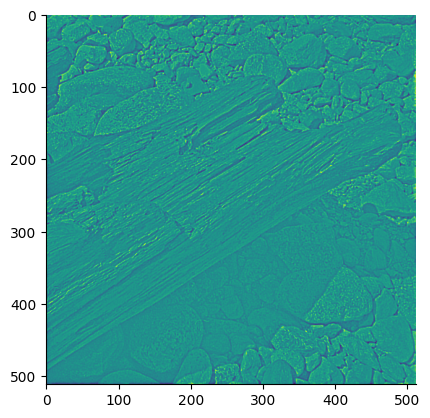

PyObject <matplotlib.image.AxesImage object at 0x0000000116E8D9D0>

In [6]:
imshow(imgs[:,:,1])

In [7]:
num_samples = 5000

5000

In [8]:
sz = 12

12

In [9]:
h, w, num_images = size(imgs)

(512, 512, 10)

In [10]:
num_inputs = sz^2

144

In [19]:
# Get the coordinates of the upper left corner of clopping image randomly.
beginx = rand(1:w-sz, num_samples)
beginy = rand(1:h-sz, num_samples)
inputs = zeros(num_samples, num_inputs)  # Input image patches

# Get images randomly
for i in 1:num_samples        
    idx = rand(1:num_images)
    img = imgs[:, :, idx]
    clop = img[beginy[i]:beginy[i]+sz-1, beginx[i]:beginx[i]+sz-1][:]
    inputs[i, :] = clop .- mean(clop)
end

In [20]:
size(inputs)

(5000, 144)

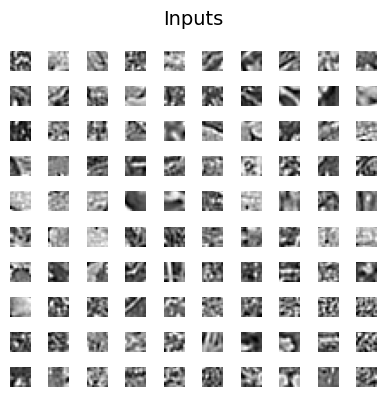

In [21]:
figure(figsize=(4,4))
suptitle("Inputs", fontsize=14)
for i in 1:100
    subplot(10,10,i)
    imshow(reshape(inputs[i, :], (sz, sz)), cmap="gray")
    axis("off")
end
tight_layout()

In [27]:
relu(x) = max.(x, 0)

relu (generic function with 1 method)

In [14]:
epoch = 100
batch_size = 50
batch_num = div(num_samples, batch_size)
n_components = 100

100

In [28]:
W = randn(n_components, num_inputs) # initialize weight
W ./= sqrt.(sum(W.^2, dims=2)); # normalization

for e in 1:epoch
    for i in 1:batch_num
        x = inputs[(i-1)*batch_size+1:i*batch_size, :]'
        W[:, :] = HebbianPCA(x, W, η=1e-4)#, func=softmax, orthogonal=false)
    end
end

funcの.をどうするか

In [29]:
W_pca = reshape(W, (100, sz, sz));

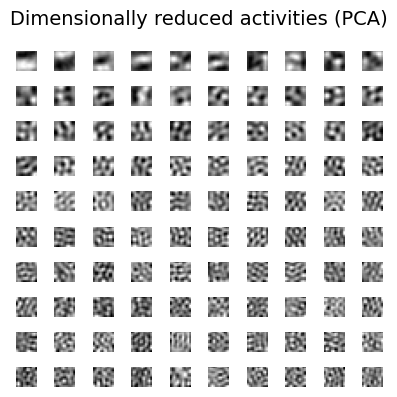

In [30]:
figure(figsize=(4,4))
suptitle("Dimensionally reduced activities (PCA)", fontsize=14)
for i in 1:100
    subplot(10,10,i)
    imshow(W_pca[i, :, :], cmap="gray")
    axis("off")
end
tight_layout()

## 参考文献
```{bibliography}
:filter: docname in docnames
```